# Data Stream Processing - Project 3 : EXstream

In [1]:
# Import librairies.
from typing import List, Tuple, Dict, Set, Union
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The data

In [2]:
# Get files
DATAPATH =  "../data/custom_no_streaming_8/folder_1"
files = glob.glob(rf"{DATAPATH}/*")
files

['../data/custom_no_streaming_8/folder_1\\1_1.csv',
 '../data/custom_no_streaming_8/folder_1\\1_2.csv',
 '../data/custom_no_streaming_8/folder_1\\2_1.csv',
 '../data/custom_no_streaming_8/folder_1\\2_2.csv',
 '../data/custom_no_streaming_8/folder_1\\3_1.csv',
 '../data/custom_no_streaming_8/folder_1\\3_2.csv',
 '../data/custom_no_streaming_8/folder_1\\labels.csv']

In [3]:
# Read anomaly files and concatenate dataframes
dfs = []
for file in files[:-1]:
    df = pd.read_csv(file)
    # Extract the filename without the parent folder path and extension
    filename = file.split('\\')[-1].split('.')[0]
    # Add a new column "anomaly_type" with the extracted filename
    df.insert(1, column="trace_id", value=filename)
    df.rename({"Unnamed: 0": "time"}, axis=1, inplace=True)
    dfs.append(df)

# Concatenate all dataframes except labels.csv
anomaly_df = pd.concat(dfs)

# Create a separate dataframe for labels.csv
labels_df = pd.read_csv(files[-1], index_col=0)

# Print the resulting dataframes
print("Concatenated DataFrame (except labels.csv):")
print(anomaly_df.shape)

print("\nLabels DataFrame:")
print(labels_df.shape)

Concatenated DataFrame (except labels.csv):
(272935, 10)

Labels DataFrame:
(29, 7)


In [4]:
# Rename values in the "anomaly_type" column based on the specified mapping
mapping = {
    "1_1": "bursty_input",
    "1_2": "bursty_input",
    "2_1": "stalled_input",
    "2_2": "stalled_input",
    "3_1": "cpu_contention",
    "3_2": "cpu_contention"
}
anomaly_df.insert(2, column="anomaly_type", value=anomaly_df['trace_id'].replace(mapping))


In [5]:
# Missing values.
anomaly_df.isna().sum()

time                                                   0
trace_id                                               0
anomaly_type                                           0
driver_BlockManager_memory_memUsed_MB_value            0
driver_jvm_heap_used_value                             0
avg_jvm_heap_used_value                                0
avg_executor_filesystem_hdfs_write_ops_value_1_diff    0
avg_executor_cpuTime_count_1_diff                      0
avg_executor_runTime_count_1_diff                      0
avg_executor_shuffleRecordsRead_count_1_diff           0
avg_executor_shuffleRecordsWritten_count_1_diff        0
dtype: int64

In [6]:
anomaly_df

,time,trace_id,anomaly_type,driver_BlockManager_memory_memUsed_MB_value,driver_jvm_heap_used_value,avg_jvm_heap_used_value,avg_executor_filesystem_hdfs_write_ops_value_1_diff,avg_executor_cpuTime_count_1_diff,avg_executor_runTime_count_1_diff,avg_executor_shuffleRecordsRead_count_1_diff,avg_executor_shuffleRecordsWritten_count_1_diff
0,0,1_1,bursty_input,2100.0,1.095197e+09,2.665584e+09,0.000000,0.000000e+00,0.0000,0.000,0.000
1,1,1_1,bursty_input,2134.0,1.100890e+09,2.690258e+09,0.000000,0.000000e+00,0.0000,0.000,0.000
2,2,1_1,bursty_input,2200.0,1.106092e+09,2.731373e+09,0.000000,0.000000e+00,0.0000,0.000,0.000
3,3,1_1,bursty_input,2265.0,1.128138e+09,2.116565e+09,0.000000,4.837354e+08,486.0000,0.000,8302.000
4,4,1_1,bursty_input,2299.0,1.165589e+09,2.580707e+09,40.000000,1.146078e+09,1529.0000,25885.000,9968.000
...,...,...,...,...,...,...,...,...,...,...,...
43094,43094,3_2,cpu_contention,12893.0,3.736669e+08,1.166263e+10,0.000000,2.516878e+09,2639.6667,0.000,37973.668
43095,43095,3_2,cpu_contention,13095.0,3.857830e+08,9.822457e+09,0.000000,1.470157e+09,1509.0000,0.000,21917.334
43096,43096,3_2,cpu_contention,13319.0,3.999292e+08,9.272556e+09,0.000000,1.807193e+09,2253.0000,0.000,25897.666
43097,43097,3_2,cpu_contention,13598.0,4.153047e+08,8.529498e+09,6.000000,1.821398e+09,1899.6666,28229.666,28906.666


In [7]:
labels_df

,trace_id,ano_id,ref_start,ref_end,ano_start,ano_end,ano_type
0,1_1,0,4247,6193,6193,7166,bursty_input
1,1_1,1,11425,13393,13393,14377,bursty_input
2,1_1,2,18659,20593,20593,21560,bursty_input
3,1_1,3,25849,27793,27793,28765,bursty_input
4,1_1,4,33049,34993,34993,35965,bursty_input
5,1_1,5,40257,42193,42193,43161,bursty_input
6,1_2,0,5055,6989,6989,7956,bursty_input
7,1_2,1,13025,14989,14989,15971,bursty_input
8,1_2,2,21043,22989,22989,23962,bursty_input
9,1_2,3,29033,30989,30989,31967,bursty_input


In [8]:
bursty_input1_df = anomaly_df[anomaly_df["trace_id"] == "1_1"]

In [9]:
bursty_input1_df

,time,trace_id,anomaly_type,driver_BlockManager_memory_memUsed_MB_value,driver_jvm_heap_used_value,avg_jvm_heap_used_value,avg_executor_filesystem_hdfs_write_ops_value_1_diff,avg_executor_cpuTime_count_1_diff,avg_executor_runTime_count_1_diff,avg_executor_shuffleRecordsRead_count_1_diff,avg_executor_shuffleRecordsWritten_count_1_diff
0,0,1_1,bursty_input,2100.0,1.095197e+09,2.665584e+09,0.0,0.000000e+00,0.0,0.0,0.0
1,1,1_1,bursty_input,2134.0,1.100890e+09,2.690258e+09,0.0,0.000000e+00,0.0,0.0,0.0
2,2,1_1,bursty_input,2200.0,1.106092e+09,2.731373e+09,0.0,0.000000e+00,0.0,0.0,0.0
3,3,1_1,bursty_input,2265.0,1.128138e+09,2.116565e+09,0.0,4.837354e+08,486.0,0.0,8302.0
4,4,1_1,bursty_input,2299.0,1.165589e+09,2.580707e+09,40.0,1.146078e+09,1529.0,25885.0,9968.0
...,...,...,...,...,...,...,...,...,...,...,...
46686,46686,1_1,bursty_input,2095.0,4.809436e+08,9.870312e+09,0.0,0.000000e+00,0.0,0.0,0.0
46687,46687,1_1,bursty_input,2143.0,4.904456e+08,9.910990e+09,0.0,0.000000e+00,0.0,0.0,0.0
46688,46688,1_1,bursty_input,2208.0,5.183927e+08,8.766686e+09,0.0,4.356684e+08,451.5,0.0,7001.5
46689,46689,1_1,bursty_input,2258.0,5.530916e+08,8.766686e+09,0.0,0.000000e+00,0.0,0.0,0.0


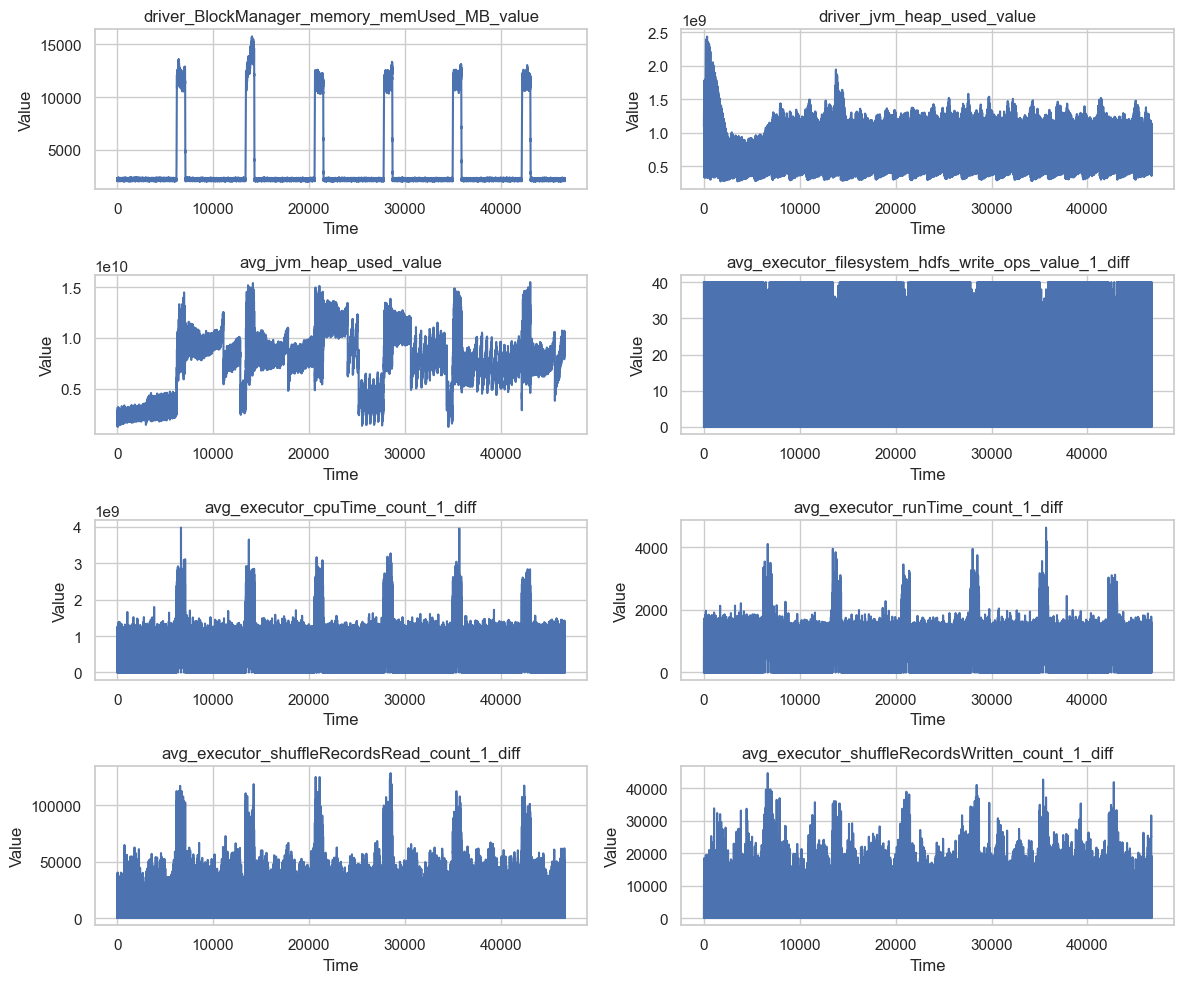

In [10]:
# Extract columns excluding the first three
columns_to_plot = bursty_input1_df.columns[3:]

# Set up the subplot grid
num_rows = 4
num_cols = 2

# Create a new figure with seaborn style
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

# Plot each column in the grid
for i, column in enumerate(columns_to_plot, 1):  # Start index at 1 for better subplot titles
    plt.subplot(num_rows, num_cols, i)
    sns.lineplot(x='time', y=column, data=bursty_input1_df)
    plt.title(column)
    plt.xlabel('Time')
    plt.ylabel('Value')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Sufficient features space

Input
- Abnormal interval: $I_A$.
- Reference interval $I_R$.

Ouput
- [ ] List of all the features occuring either during $I_A$ or $I_R$. 
  - [ ] Filter the data according to the time two intervals.
  - [ ] Remove features that do not vary during this intervals / Select all the features varying during this time interval.

In [11]:
# #---CODE HERE----
# def sufficient_features_space(
#         data: pd.DataFrame | np.ndarray,
#         time_feature: str | int,
#         ref_start: int, 
#         ref_end: int, 
#         ano_start: int, 
#         ano_end: int) -> List[str] | List[int]:
    
#     if isinstance(data, pd.DataFrame):
#         mask_ref = data[time_feature].between(ref_start, ref_end)
#         mask_ano = data[time_feature].between(ano_start, ano_end)
#         mask_intervals = mask_ref and mask_ano
#         relevant_data = data[mask_intervals]
#         return [col for col in relevant_data.columns if relevant_data[col].var() > 10e-16]
#     else:
#         raise AttributeError("`data` is not a dataframe")
#     # pass

In [12]:
# sufficient_features_space(bursty_input1_df, time_feature=)

## Single feature reward (section 4)

Workflow:
* [ ] Class Entropy
* [ ] Segmentation Entropy
* [ ] Penalization (for mixed segments)
* [ ] Normalization by feature size

### Class entropy

**Input**
* $TS_A$, $TS_R$ two time series from the abnormal and the reference intervals respectively.

**Compute**

* $|TS_A|$, $|TS_A|$: number of points in the two series.
* The weight of each series (empirical probability that one point belong to that class).
$$
    p_A = \frac{|TS_A|}{|TS_A| + |TS_R|}, \quad p_R = \frac{|TS_R|}{|TS_A| + |TS_R|}
$$
* The class entropy of the feature $f$:
$$
    H_{Class}(f) = p_A \cdot \log\left(\frac{1}{p_A}\right) + p_R \cdot \log\left(\frac{1}{p_R}\right)
$$

In [13]:
#---CODE HERE----
def filter_feature(data: pd.DataFrame, time: str, feature: str, ref_start: int, ref_end: int, ano_start: int, ano_end: int):
    mask_ref = (ref_start <= data[time]) & (data[time] <= ref_end)
    mask_ano = (ano_start <= data[time]) & (data[time] <= ano_end)
    TSA = data.loc[mask_ano, [time, feature]].set_index(time)
    TSR = data.loc[mask_ref, [time, feature]].set_index(time)
    return TSA, TSR

In [20]:
ref_start, ref_end, ano_start, ano_end = labels_df.loc[0, ["ref_start", "ref_end", "ano_start", "ano_end"]]
TSA, TSR = filter_feature(data=bursty_input1_df,
               time="time",
               feature="avg_executor_cpuTime_count_1_diff",
               ref_start=ref_start,
               ref_end=ref_end,
               ano_start=ano_start,
               ano_end=ano_end)

print(ref_start, ref_end, ano_start, ano_end)
print(TSR.shape, TSR.iloc[[1,-1], 0])
print(TSA.shape, TSA.iloc[[1,-1], 0])

4247 6193 6193 7166
(1947, 1) time
4248    494238180.0
6193    423371900.0
Name: avg_executor_cpuTime_count_1_diff, dtype: float64
(974, 1) time
6194    1.444361e+09
7166    0.000000e+00
Name: avg_executor_cpuTime_count_1_diff, dtype: float64


In [39]:
def class_entropy(TSA, TSR):
    """
    Calculate the class entropy between two time series.

    Parameters:
    - TSA: Time series belonging to the abnormal class.
    - TSR: Time series belonging to the reference class.

    Returns:
    - HClass: Class entropy.
    """
    # Calculate the number of points in the two time series
    len_TSA = len(TSA)
    len_TSR = len(TSR)

    # Calculate probabilities
    pA = len_TSA / (len_TSA + len_TSR)
    pR = len_TSR / (len_TSA + len_TSR)

    # Calculate class entropy
    HClass = pA * np.log(1 / pA) + pR * np.log(1 / pR)

    return HClass

In [47]:
class_ent = class_entropy(TSA, TSR)
print(class_ent)

0.6365932382975314


### Segmentation entropy

**Input**
* Time series $TS$ of a feature $f$: $(X_t)_{t=1,\dots,T}$.
* Anomaly time annotations: $A_S = (a_s)_{s=1,\dots, S}  \subset \{1, \dots, T\}$  

Example: In the sequence, AANNNNANNN. The anomaly time anotations would be (1,2,7). We are given only the different time intervals from which we have to derive the different anomaly time anotation and then the segment (this is just an heuristic, not necessarily the way it would be implemented).


**Compute**
* Sort the feature time series values in increasing order.
* Tag each feature value depending of if it appears during the anormal interval only (YELLOW), the reference interval only (RED), or in both interval (BLUE).
* The segments. A segment is a (contiguous) sequence of point with the same label (anomaly or not anomaly).
* The segmentation entropy of the feature $f$:
$$
    H_{Segmentation}(f) = \sum_{i=1}^{n} p_i \cdot \log\left(\frac{1}{p_i}\right)
$$

In [ ]:
#---CODE HERE----
def segmentation_entropy():
    pass

### Penalization for mixed segments

$$
    H^+_{Segmentation}(f) = H_{Segmentation}(f) + \sum_{j=1}^{m} H_{Segmentation}(c_j^*)
$$

In [ ]:
def reorder_mixed_segment():
    pass

def segment_penalty(): # ???
    pass

def penalized_segmentation_entropy():
    pass

### Normalization by feature size

$$
    D(f) = \dfrac{H_{Class}(f)}{H^+_{Segmentation}(f)}
$$

In [ ]:
def single_reward_function(feature):
    return class_entropy(feature) / penalized_segmentation_entropy(feature)

### Testing `single_reward_function`

## Constructing explanations (section 5)